
WPC High/Low Data
=========

Plots surface highs and lows from WPC text files.
https://thredds-test.unidata.ucar.edu/thredds/catalog/noaaport/text/fronts/catalog.html

* Data kept on server for approx. 1 month every (roughly) 3 hours -> not every time...


#### Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

from matplotlib import patheffects
outline_effect = [patheffects.withStroke(linewidth=3, foreground='black')]


In [2]:
filename = "Fronts_highres_KWBC_20201025_0000.txt"


In [3]:
os.chdir("scripts/")
import hilo_parse as hilo_parse

In [4]:
import create_map as cm

In [5]:
extent=[-130, -65, 20, 65]

---

In [6]:
os.chdir("../data/")

In [7]:
hilo_data = hilo_parse.parse_hilo(filename,"LOWS")

In [8]:
hilo_values = hilo_data.split()[0::2] # pressure values
hilo_points = hilo_data.split()[1::2] # coded lat/lon string
lats_hilo,lons_hilo = hilo_parse.get_HiLo_lat_lon(hilo_points)

In [9]:
clipped_lat = []
clipped_lon = []
for i in range(len(lats_hilo)):
    if extent[2]-1 < lats_hilo[i] < extent[3]+1:
        clipped_lat.append(lats_hilo[i])
        clipped_lon.append(lons_hilo[i])
    else:
        print(f"{i}  outside of plotted lat/lon extent")

13  outside of plotted lat/lon extent
14  outside of plotted lat/lon extent
16  outside of plotted lat/lon extent
17  outside of plotted lat/lon extent
18  outside of plotted lat/lon extent
19  outside of plotted lat/lon extent
33  outside of plotted lat/lon extent
34  outside of plotted lat/lon extent
36  outside of plotted lat/lon extent
37  outside of plotted lat/lon extent
38  outside of plotted lat/lon extent
39  outside of plotted lat/lon extent


In [10]:
font = {'family': 'serif',
            'color':  'darkred',
            'weight': 'normal',
            'size': 18,
            }

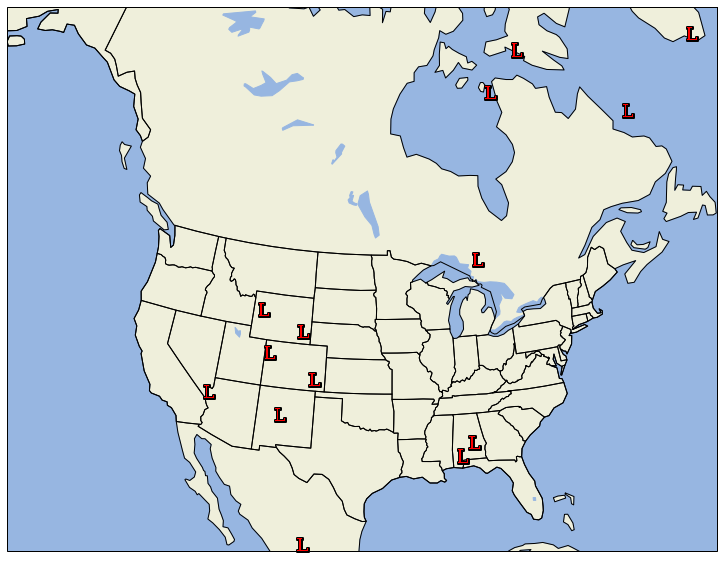

In [14]:
fig,ax,ccrs = cm.create_map()
for i in range(len(clipped_lon)):
    plt.text(clipped_lon[i], clipped_lat[i], color='r',s="L" ,
         transform=ccrs.PlateCarree(),path_effects=outline_effect,fontdict=font)
plt.show()